# <p align="center">Siemens Sales Forecast</p>

---

## <p align="center">*2 - Feature Selection & Modeling*</p>

---

### 👥 **Team Members**
- **Ana Farinha** *(Student Number: 20211514)*  
- **António Oliveira** *(Student Number: 20211595)*  
- **Mariana Neto** *(Student Number: 20211527)*  
- **Salvador Domingues** *(Student Number: 20240597)*  

📅 **Date:** *April 1, 2025*  
📍 **Prepared for:** *Siemens*  

**GitHub Repo:** https://github.com/MGN19/Siemens-forecast

---

# ToC

<a class="anchor" id="top"></a>


1. [Import Libraries & Data](#1.-Import-Libraries-&-Data) <br><br>

In [1]:
## CELL TYPES (remover depois)

<div class="alert-danger">
    
test

<div class="alert-warning">
    
test

<div class="alert-info">
    
test

# 1. Import Libraries & Data

In [6]:
import os
import pandas as pd

pd.set_option('display.max_columns', None)

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")


**Data**

In [14]:
folder_path = './data/individual_dfs/'

# List to store the names of each dataframe
imported_df_names = []

for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        df_name = file.replace('.csv', '')  # Get name without .csv
        df_path = os.path.join(folder_path, file)
        
        # Read CSV and assign to a variable
        globals()[df_name] = pd.read_csv(df_path, index_col=0)
        
        # Store the dataframe name in the list
        imported_df_names.append(df_name)

# Convert the index of all DataFrames to datetime
for df_name in imported_df_names:
    globals()[df_name].index = pd.to_datetime(globals()[df_name].index)

# Optional: print to check
print(imported_df_names)

['df_8_diff', 'df_14', 'df_16', 'df_12', 'df_13', 'df_9', 'df_11', 'df_8', 'df_5', 'df_20', 'df_4', 'df_36', 'df_6', 'df_3', 'df_1']


# #1

In [15]:
df_1.head(3)

,#1,Year,Month,Semester,sin_month,cos_month,WeekendDaysCount,TotalDaysInMonth,WeekendDaysPercentage,SundayCount,GerHolidayCount,CHI Production Index,CHI Shipments Index,FRA Production Index,FRA Shipments Index,GER Production Index,GER Shipments Index,ITA Production Index,ITA Shipments Index,JAP Production Index,JAP Shipments Index,SWI Production Index,SWI Shipments Index,UK Production Index,UK Shipments Index,USA Production Index,USA Shipments Index,Europe Production Index,Europe Shipments Index,(W) Price of Base Metals,(W) Price of Energy,(W) Price of Metals & Minerals,(W) Price of Natural gas index,"(W) Price of Crude oil, average",(W) Price of Copper,USA EUR to LCU Conversion Rate,USA EE Producer Prices,UK EE Producer Prices,ITA EE Producer Prices,FRA EE Producer Prices,GER EE Producer Prices,CHI EE Producer Prices,USA Machinery & Equipment Index,(W) Machinery & Equipment Index,SWI Machinery & Equipment Index,UK Machinery & Equipment Index,ITA Machinery & Equipment Index,JAP Machinery & Equipment Index,FRA Machinery & Equipment Index,GER Machinery & Equipment Index,USA EE Production Index,(W) EE Production Index,SWI EE Production Index,UK EE Production Index,ITA EE Production Index,JAP EE Production Index,FRA EE Production Index,GER EE Production Index
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-10-01,36098918.79,2018,10,2,-8.660254e-01,0.500000,8,31,25.806452,4,1,211.955755,211.955755,108.280608,122.451734,124.227879,137.741953,118.350514,122.456894,125.209957,124.793250,109.077781,104.594781,113.659322,112.318030,111.902540,127.808839,124.391967,130.989253,86.102586,100.222169,79.354986,89.570796,97.072264,82.545082,1.1484,110.700409,111.463669,105.297836,102.064743,109.119614,96.318329,111.422638,131.340118,106.816937,110.893450,129.389221,131.503786,114.720810,127.461136,112.853256,129.325775,112.970843,118.670791,93.001511,112.376774,97.849541,118.298233
2018-11-01,5140760.00,2018,11,2,-5.000000e-01,0.866025,8,30,26.666667,4,0,220.519655,220.519655,99.636911,115.958210,127.404132,142.732193,107.719260,120.132032,122.624695,123.289888,112.241491,107.656238,115.088417,112.801011,110.880401,117.675874,123.070091,132.934130,83.841374,84.436807,77.500875,97.362468,78.841167,82.230939,1.1367,110.994026,111.668373,105.297836,102.064743,109.224838,95.370118,109.737129,129.976456,110.792831,112.119922,117.990173,127.880755,104.873100,132.987915,113.145294,128.236176,114.736013,120.467019,84.133400,111.907535,91.155960,117.163727
2018-12-01,37889612.12,2018,12,2,-2.449294e-16,1.000000,10,31,32.258065,5,2,241.846854,241.846854,94.690312,115.128469,120.518565,141.407661,88.783181,131.936099,122.991956,124.508413,115.405201,110.717696,101.556108,94.503733,106.257796,123.280134,113.858005,131.261348,82.733389,74.898746,76.071705,94.406578,68.268564,80.630361,1.1384,111.162231,112.794266,105.297836,102.166710,109.330063,94.994885,103.448280,124.202469,114.768725,99.446384,99.191734,128.125679,104.974617,137.363281,111.823624,117.043549,116.501182,105.378705,64.881248,112.524242,78.033028,89.626122


**Train-Validation Split**

In [21]:
train = df_1[df_1.index < split_date]
val = df_1[df_1.index >= split_date]

X_train_1 = train.drop(['#1'], axis=1) 
y_train_1 = train['#1']


X_val_1 = val.drop(['#1'], axis=1) 
y_val_1 = val['#1']

**Scaling**

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

In [24]:
X_train_1_scaled = pd.DataFrame(scaler.fit_transform(X_train_1), columns=X_train_1.columns, index=X_train_1.index)
X_val_1_scaled = pd.DataFrame(scaler.transform(X_val_1), columns=X_val_1.columns, index=X_val_1.index)


In [26]:
X_train_1_scaled.head(2)

,Year,Month,Semester,sin_month,cos_month,WeekendDaysCount,TotalDaysInMonth,WeekendDaysPercentage,SundayCount,GerHolidayCount,CHI Production Index,CHI Shipments Index,FRA Production Index,FRA Shipments Index,GER Production Index,GER Shipments Index,ITA Production Index,ITA Shipments Index,JAP Production Index,JAP Shipments Index,SWI Production Index,SWI Shipments Index,UK Production Index,UK Shipments Index,USA Production Index,USA Shipments Index,Europe Production Index,Europe Shipments Index,(W) Price of Base Metals,(W) Price of Energy,(W) Price of Metals & Minerals,(W) Price of Natural gas index,"(W) Price of Crude oil, average",(W) Price of Copper,USA EUR to LCU Conversion Rate,USA EE Producer Prices,UK EE Producer Prices,ITA EE Producer Prices,FRA EE Producer Prices,GER EE Producer Prices,CHI EE Producer Prices,USA Machinery & Equipment Index,(W) Machinery & Equipment Index,SWI Machinery & Equipment Index,UK Machinery & Equipment Index,ITA Machinery & Equipment Index,JAP Machinery & Equipment Index,FRA Machinery & Equipment Index,GER Machinery & Equipment Index,USA EE Production Index,(W) EE Production Index,SWI EE Production Index,UK EE Production Index,ITA EE Production Index,JAP EE Production Index,FRA EE Production Index,GER EE Production Index
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-10-01,0.0,0.818182,1.0,0.066987,0.750000,0.0,1.000000,0.000000,0.0,0.333333,0.426112,0.426112,0.980059,0.814700,0.931461,0.792723,1.00000,0.706060,0.703488,0.656106,0.831734,0.830289,0.820318,0.903393,0.959252,0.478296,0.898632,0.712483,0.299988,0.747675,0.229132,0.274467,0.912542,0.227590,0.475172,0.008362,0.074074,0.049383,0.0,0.000000,0.720231,0.874166,0.736932,0.784014,0.896285,0.998645,0.746429,0.938389,0.824131,0.957768,0.612797,0.909385,0.648855,0.854916,0.603420,1.000000,0.960106
2018-11-01,0.0,0.909091,1.0,0.250000,0.933013,0.0,0.666667,0.114286,0.0,0.000000,0.470878,0.470878,0.832793,0.723537,1.000000,0.881721,0.84304,0.681677,0.661376,0.633657,0.915867,0.915144,0.842600,0.911347,0.913302,0.224391,0.873280,0.741824,0.263937,0.575604,0.198354,0.312945,0.676390,0.222953,0.385791,0.024710,0.111110,0.049383,0.0,0.015873,0.606900,0.813866,0.706148,0.892007,0.914861,0.844173,0.689841,0.785150,0.922290,0.976167,0.586961,0.954693,0.677481,0.714628,0.595043,0.873754,0.930851


## 2.1 Feature Selection

### 2.1.1 Filter Methods

**Variance Threshold**

In [27]:
X_train_1_scaled.var() 

Year                               0.102564
Month                              0.105932
Semester                           0.255061
sin_month                          0.124685
cos_month                          0.130635
WeekendDaysCount                   0.162281
TotalDaysInMonth                   0.069276
WeekendDaysPercentage              0.111393
SundayCount                        0.228070
GerHolidayCount                    0.090418
CHI Production Index               0.051186
CHI Shipments Index                0.051186
FRA Production Index               0.053707
FRA Shipments Index                0.043151
GER Production Index               0.052062
GER Shipments Index                0.055482
ITA Production Index               0.070956
ITA Shipments Index                0.048920
JAP Production Index               0.048273
JAP Shipments Index                0.045431
SWI Production Index               0.053813
SWI Shipments Index                0.055367
UK Production Index             

**Spearman Correlation**

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

def correlation_matrix(X, cmap='YlOrBr', font_size = 5):
    """
    Input: X (numerical data)
    Output: Correlation Matrix
    """
    
    # Correlation matrix
    corr_matrix = X.corr().abs()

    # Plot Heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt=".2f", annot_kws={"size": font_size})
    plt.title("Feature Correlation Matrix")
    plt.show()

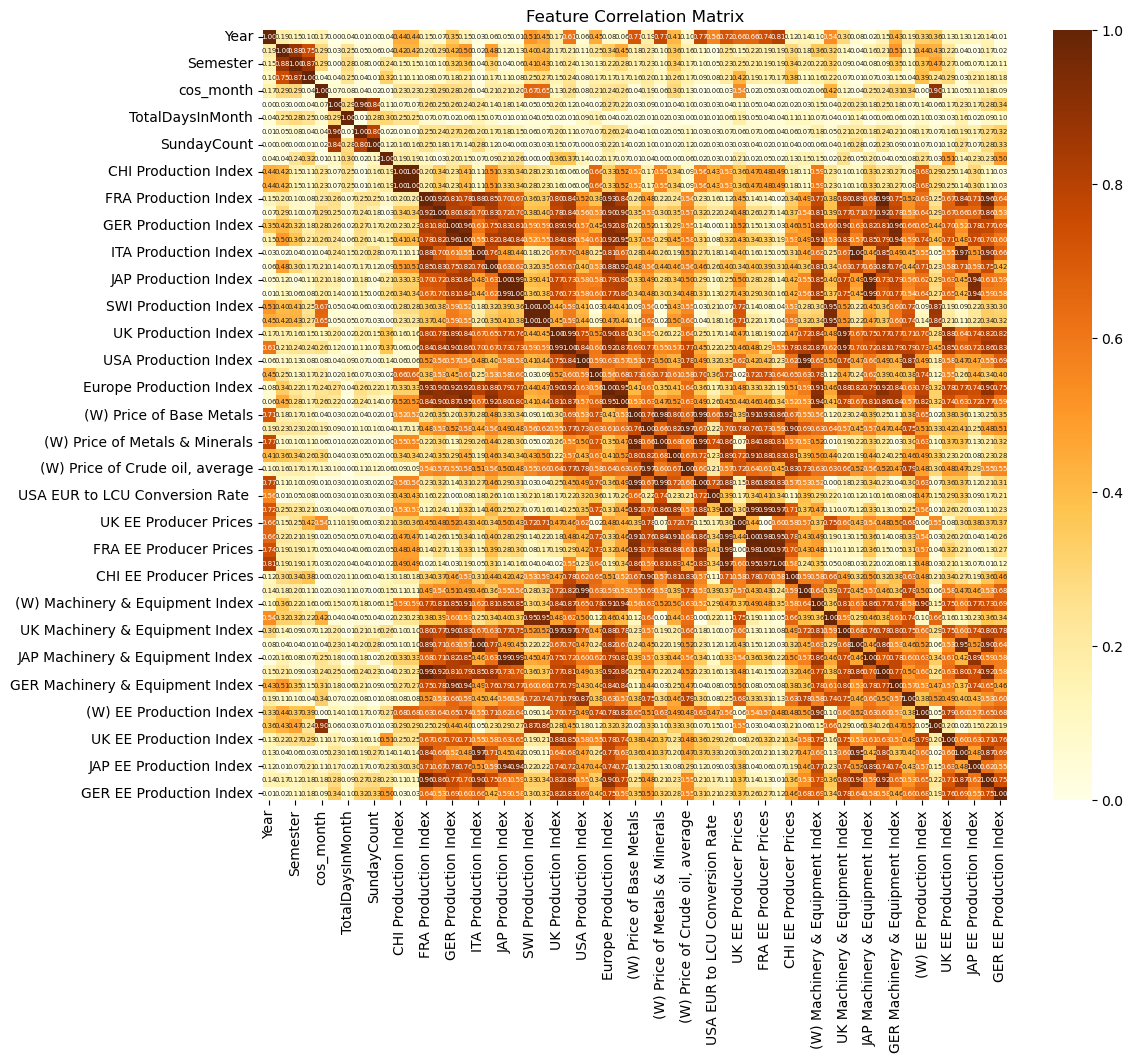

In [36]:
correlation_matrix(X_train_1_scaled)

In [37]:
def top_correlated_features(X, top_n=20, cmap='YlOrBr'):
    corr_matrix = X.corr().abs()
    mean_corr = corr_matrix.mean().sort_values(ascending=False)
    top_features = mean_corr.head(top_n).index
    plt.figure(figsize=(10, 8))
    sns.heatmap(X[top_features].corr(), annot=True, cmap=cmap, fmt=".2f", annot_kws={"size": 8})
    plt.title(f"Top {top_n} Most Correlated Features")
    plt.show()


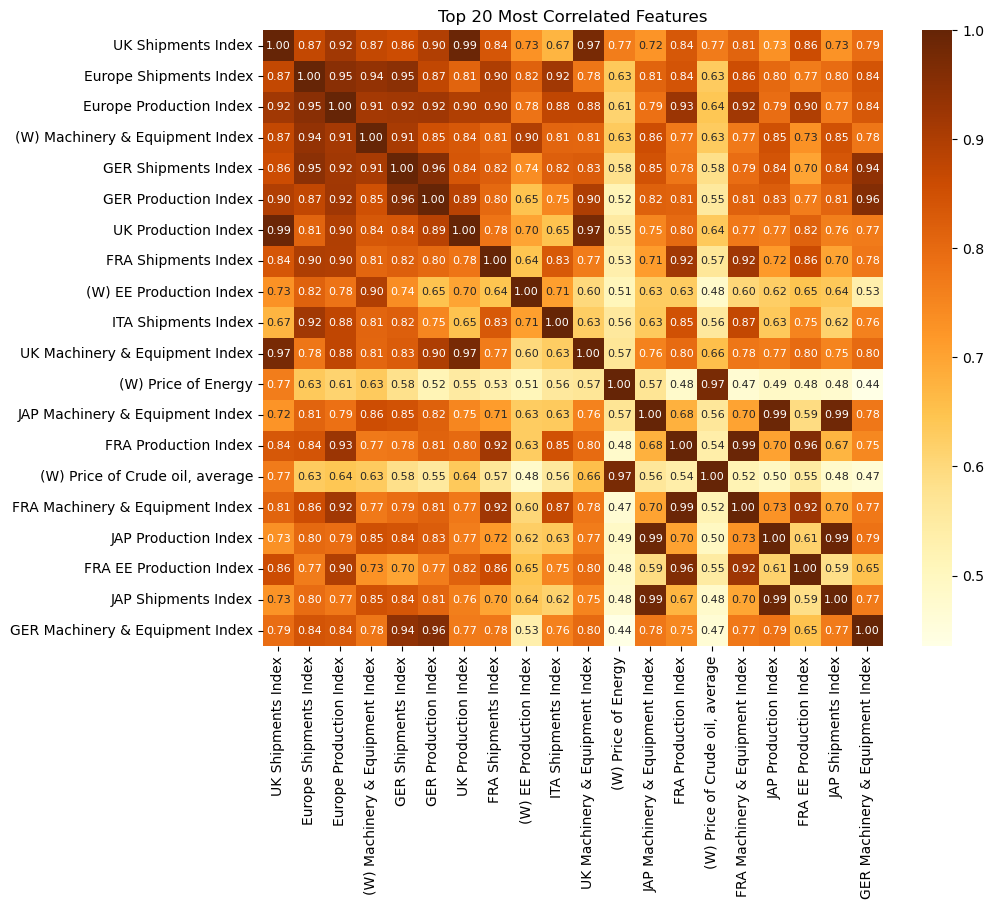

In [38]:
top_correlated_features(X_train_1_scaled)

### 2.2.2 Wrapper Methods

**RFE**

In [56]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

def rfe(X_train, y_train, X_val, y_val, n_features, model=None):
    """
    Input: 
        X_train, y_train, X_val, y_val: training and validation data
        n_features: number of features to use for RFE
        model: chosen regression model 
    Output: selected features for the best model based on RMSE
    """
    
    best_rmse = np.inf  # Start with a very high RMSE (lower is better)
    best_features = []

    results = {}
    
    for feature in n_features:
        
        # Fit RFE
        rfe = RFE(estimator=model, n_features_to_select=feature)
        rfe.fit(X_train, y_train)

        # Get selected features
        selected_features = X_train.columns[rfe.support_]
        
        print('\n-------------TRAIN-------------')

        # Predictions for Train
        y_pred_train = rfe.predict(X_train)
        
        # Metrics for Training (RMSE)
        mse_train = mean_squared_error(y_train, y_pred_train)
        rmse_train = np.sqrt(mse_train)
        
        print(f"RMSE for {feature} features (Train): {rmse_train:.4f}")
        
        print('----------VALIDATION----------')

        # Predictions for Validation
        y_pred_val = rfe.predict(X_val)
        
        # Metrics for Validation (RMSE)
        mse_val = mean_squared_error(y_val, y_pred_val)
        rmse_val = np.sqrt(mse_val)
        
        print(f"RMSE for {feature} features (Validation): {rmse_val:.4f}")
        
        # Best score based on RMSE (lower is better)
        if rmse_val < best_rmse:
            best_rmse = rmse_val
            best_features = selected_features.tolist()  
    
    return best_features


In [58]:
## TEMP
X_train_1_scaled.fillna(0, inplace = True)
X_val_1_scaled.fillna(0, inplace = True)

n_features = np.arange(1, len(X_train_1_scaled.columns) + 1)
model = LinearRegression()

rfe(X_train_1_scaled, y_train_1, X_val_1_scaled, y_val_1, 
                                n_features = n_features, 
                                model = model)


-------------TRAIN-------------
RMSE for 1 features (Train): 6012352.2793
----------VALIDATION----------
RMSE for 1 features (Validation): 3819302.8675

-------------TRAIN-------------
RMSE for 2 features (Train): 5971615.3701
----------VALIDATION----------
RMSE for 2 features (Validation): 4252446.9750

-------------TRAIN-------------
RMSE for 3 features (Train): 5703454.9281
----------VALIDATION----------
RMSE for 3 features (Validation): 3000719.0587

-------------TRAIN-------------
RMSE for 4 features (Train): 5790145.3780
----------VALIDATION----------
RMSE for 4 features (Validation): 3871353.8198

-------------TRAIN-------------
RMSE for 5 features (Train): 5718881.8070
----------VALIDATION----------
RMSE for 5 features (Validation): 3096443.0844

-------------TRAIN-------------
RMSE for 6 features (Train): 6055933.6688
----------VALIDATION----------
RMSE for 6 features (Validation): 3064896.9758

-------------TRAIN-------------
RMSE for 7 features (Train): 5508952.0077
-------

['FRA Production Index',
 'ITA Production Index',
 'USA Production Index',
 'USA Machinery & Equipment Index',
 'ITA Machinery & Equipment Index',
 'FRA Machinery & Equipment Index',
 'USA EE Production Index',
 'ITA EE Production Index',
 'FRA EE Production Index']

In [59]:
## TEMP
X_train_1_scaled.fillna(0, inplace = True)
X_val_1_scaled.fillna(0, inplace = True)


from sklearn.tree import DecisionTreeRegressor

n_features = np.arange(1, len(X_train_1_scaled.columns) + 1)
model = DecisionTreeRegressor(random_state=42)

rfe(X_train_1_scaled, y_train_1, X_val_1_scaled, y_val_1, 
                                n_features = n_features, 
                                model = model)


-------------TRAIN-------------
RMSE for 1 features (Train): 0.0000
----------VALIDATION----------
RMSE for 1 features (Validation): 4563550.8007

-------------TRAIN-------------
RMSE for 2 features (Train): 0.0000
----------VALIDATION----------
RMSE for 2 features (Validation): 4515848.9321

-------------TRAIN-------------
RMSE for 3 features (Train): 0.0000
----------VALIDATION----------
RMSE for 3 features (Validation): 6515049.3971

-------------TRAIN-------------
RMSE for 4 features (Train): 0.0000
----------VALIDATION----------
RMSE for 4 features (Validation): 7907936.1692

-------------TRAIN-------------
RMSE for 5 features (Train): 0.0000
----------VALIDATION----------
RMSE for 5 features (Validation): 6420251.8925

-------------TRAIN-------------
RMSE for 6 features (Train): 0.0000
----------VALIDATION----------
RMSE for 6 features (Validation): 7898981.9757

-------------TRAIN-------------
RMSE for 7 features (Train): 0.0000
----------VALIDATION----------
RMSE for 7 feature

['GER Production Index', 'Europe Shipments Index']

### 2.2.3 Embedded Methods

**LASSO**

In [61]:
from sklearn.linear_model import Lasso
import functions as f
def lasso(X, y, alpha = 0.01, color = f.main_color):

    """
    Input: 
        X, y: data
        alpha: parameter for lasso
    Output: Plot, initial and selected features
    """
    
    # Fit
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    
    # Get Feature Importance
    importance = pd.Series(lasso.coef_, index=X.columns)
    importance.sort_values().plot(kind="barh", color=color)
    non_zero_importance = importance[importance != 0]
    selected_features = non_zero_importance.index

    # Plot
    plt.title("Lasso Feature Importance")
    plt.xlabel("Coefficient Value")
    plt.show()
    
    # Print Results
    print(f"\nInitial Features: {len(X.columns)}\n")
    print(X.columns.tolist())
    print(f"\nDecision for Numerical Features (lasso ≠ 0): {len(selected_features.tolist())}\n")
    print(selected_features.tolist())


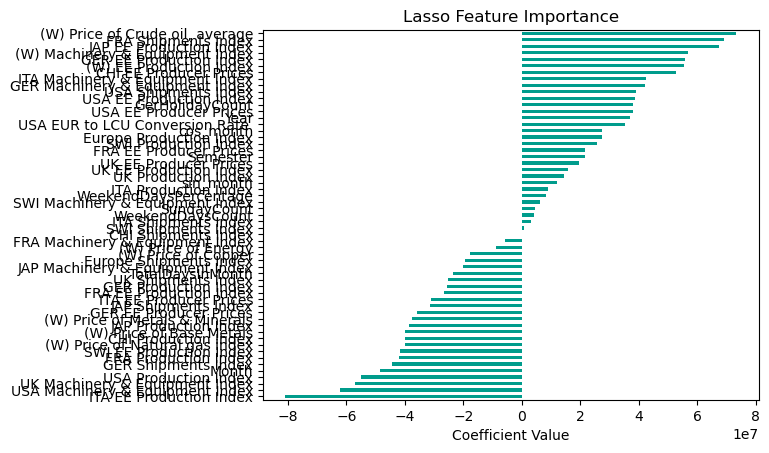


Initial Features: 57

['Year', 'Month', 'Semester', 'sin_month', 'cos_month', 'WeekendDaysCount', 'TotalDaysInMonth', 'WeekendDaysPercentage', 'SundayCount', 'GerHolidayCount', 'CHI Production Index', 'CHI Shipments Index', 'FRA Production Index', 'FRA Shipments Index', 'GER Production Index', 'GER Shipments Index', 'ITA Production Index', 'ITA Shipments Index', 'JAP Production Index', 'JAP Shipments Index', 'SWI Production Index', 'SWI Shipments Index', 'UK Production Index', 'UK Shipments Index', 'USA Production Index', 'USA Shipments Index', 'Europe Production Index', 'Europe Shipments Index', '(W) Price of Base Metals', '(W) Price of Energy', '(W) Price of Metals & Minerals', '(W) Price of Natural gas index', '(W) Price of Crude oil, average', '(W) Price of Copper', 'USA EUR to LCU Conversion Rate ', 'USA EE Producer Prices', 'UK EE Producer Prices', 'ITA EE Producer Prices', 'FRA EE Producer Prices', 'GER EE Producer Prices', 'CHI EE Producer Prices', 'USA Machinery & Equipment I

In [63]:
lasso(X_train_1_scaled, y_train_1, alpha = 0.05)